In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("/content/CHURN_CREDIT_MOD14.csv", delimiter=';')

df.head(10)

/tmp/ipython-input-779397379.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/CHURN_CREDIT_MOD14.csv", delimiter=';')


,CustomerId,Sobrenome,Credit_Score,Pais,Genero,Idade,Tempo_Credito,Balance,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
0,15813451,Fleetwood-Smith,677,Spain,Male,18.0,5,134796.87,2,1.0,0.0,114858.9,0.0
1,15641688,Collier,644,Spain,Female,18.0,7,0.00,1,0.0,1.0,74564.41,0.0
2,15757821,Burgess,641,Spain,Male,18.0,1,0.00,2,0.0,1.0,41542.95,0.0
3,15673180,Onyekaozulu,826,Spain,Male,18.0,2,0.00,2,0.0,1.0,16245.25,0.0
4,15664543,Tuan,774,Spain,Female,18.0,1,185891.54,1,1.0,0.0,175072.41,0.0
5,15673180,Onyekaozulu,688,Spain,Female,18.0,2,0.00,2,1.0,0.0,98349.13,0.0
6,15641688,Collier,803,Spain,Male,18.0,6,0.00,1,0.0,0.0,59645.24,1.0
7,15672940,Yevseyev,578,Spain,Female,18.0,8,71843.15,2,0.0,1.0,112649.22,0.0
8,15694192,Nwankwo,598,Spain,Male,18.0,6,0.00,2,0.0,1.0,173783.38,0.0
9,15585867,Iroawuchi,624,Spain,Female,18.0,6,0.00,2,0.0,1.0,117038.96,0.0


In [4]:
df.dtypes

# 1 Removendo os pontos da coluna Salario_Anual
df['Salario_Anual'] = df['Salario_Anual'].str.replace('.', '', regex=False)

# 2 Fazendo a conversão novamente dos dados
df['Salario_Anual'] = df['Salario_Anual'].astype(float)

df.dtypes

,0
CustomerId,int64
Sobrenome,object
Credit_Score,int64
Pais,object
Genero,object
Idade,float64
Tempo_Credito,int64
Balance,float64
Qtd_Produtos,int64
Possui_Cartao,float64


In [5]:
# 1.Para verificar se há valores nulos em todo o DataFrame:
df.isnull().values.any()

# 2.Para contar o número de valores nulos em cada coluna:
df.isnull().sum()

,0
CustomerId,0
Sobrenome,0
Credit_Score,0
Pais,0
Genero,10
Idade,206
Tempo_Credito,0
Balance,0
Qtd_Produtos,0
Possui_Cartao,0


In [6]:
# 3.Para contar o número de valores nulos em cada coluna:
(df.isnull().sum() / len(df)) * 100

,0
CustomerId,0.000
Sobrenome,0.000
Credit_Score,0.000
Pais,0.000
Genero,0.010
Idade,0.206
Tempo_Credito,0.000
Balance,0.000
Qtd_Produtos,0.000
Possui_Cartao,0.000


In [7]:
# 1.Coluna Genero:
# Nessa coluna temos apenas 0.01% dos dados faltantes, é muito pouco para uma base tão grande,
# nesse caso podemos apenas excluir as linhas faltantes.
df[df['Genero'].isnull()]

# Excluindo:
df.dropna(subset=['Genero'], inplace=True)
#inplace=True faz com que as alterações sejam feitas diretamente no DataFrame original

In [8]:
# 2.Coluna Idade:
#A coluna idade também representa uma % pequena dos nossos dados então podemos realizar a exclusão dessas linhas também:

# Excluindo:
df.dropna(subset=['Idade'], inplace=True)
#inplace=True faz com que as alterações sejam feitas diretamente no DataFrame original

df['Idade'].isnull().sum()

np.int64(0)

In [9]:
# 3.Coluna Salário:
# Essa coluna é um grande desafio para nós, pois ela tem 65% dos dados dela faltantes. É MAIS DA METADE.
# Para prosseguir, possuímos duas opções: deletar as linhas com dados faltantes ou assumir uma troca de__
# dados faltantes pela média, mediana ou moda para dados categóricos.


In [10]:
#Para termos certeza teremos que analisar mais a fundo a distribuição dos dados.
df['Salario_Anual'].mean()

np.float64(10280264.388924362)

In [11]:
# A média do salário anual é de 1.02 Milhões
#Para termos certeza teremos que analisar mais a fundo a distribuição dos dados.
df['Salario_Anual'].median()

10787643.5

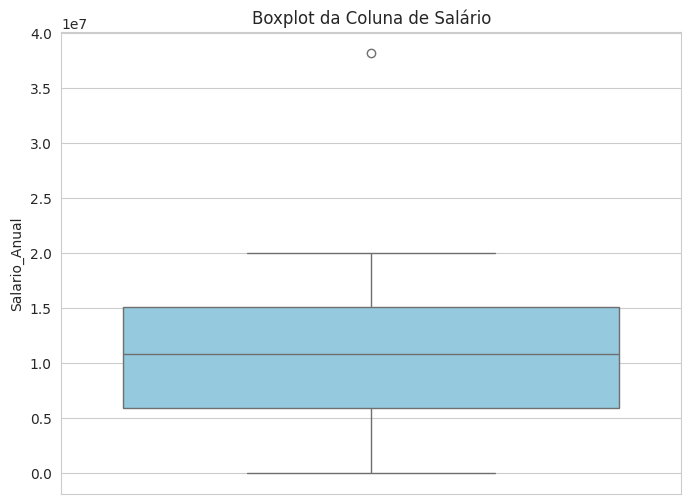

In [12]:
# A mediana está próxima da media, com 1.07 Milhões. Esse é um bom sinal,
# em um primeiro momento os dados parecem bem distribuidos.

# é uma função da biblioteca Seaborn que define o estilo estético dos gráficos produzidos por Seaborn. Neste caso, 'whitegrid' é um dos estilos disponíveis em Seaborn
sns.set_style('whitegrid')

# Plota o boxplot da coluna de salário
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Salario_Anual', color='skyblue')
plt.title('Boxplot da Coluna de Salário')
plt.ylabel('Salario_Anual')
plt.show()

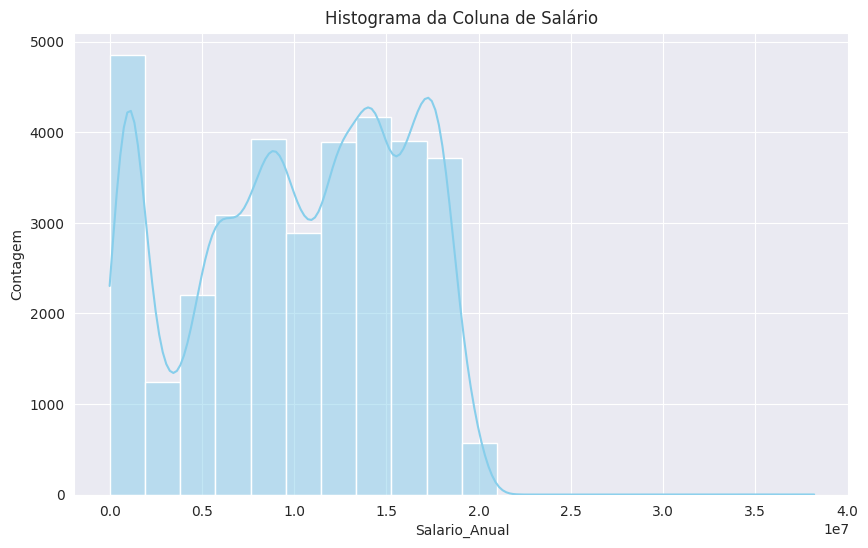

In [13]:
sns.set_style('darkgrid')

# Plotando um histograma dos salários para analisarmos a distribuição dos dados
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Salario_Anual', bins=20, kde=True, color='skyblue')
plt.title('Histograma da Coluna de Salário')
plt.xlabel('Salario_Anual')
plt.ylabel('Contagem')
plt.show()

Nós identificamos que existe um outlier nos dados de salário. Para termos uma mediana mais justa é interessante calcularmos ela sem esse outlier. (Na próxima aula aprenderemos a tratar outliers)

In [14]:
# Então vamos trazer a mediana dos salários removendo salários acima de 2 milhões
salarios_abaixo_2milhoes = df[df['Salario_Anual'] < 2000000]
salarios_abaixo_2milhoes['Salario_Anual'].median()

1011687.0

In [15]:
mediana_salario_abaixo_2milhoes = df[df['Salario_Anual'] < 2000000]['Salario_Anual'].median()
# Substitui os valores faltantes na coluna de salário pela mediana
df['Salario_Anual'].fillna(mediana_salario_abaixo_2milhoes, inplace=True)

/tmp/ipython-input-1164899669.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salario_Anual'].fillna(mediana_salario_abaixo_2milhoes, inplace=True)


In [16]:
df['Salario_Anual'].isnull().sum()

df['Salario_Anual'].median()

1011687.0

<Axes: xlabel='Churn', ylabel='Count'>

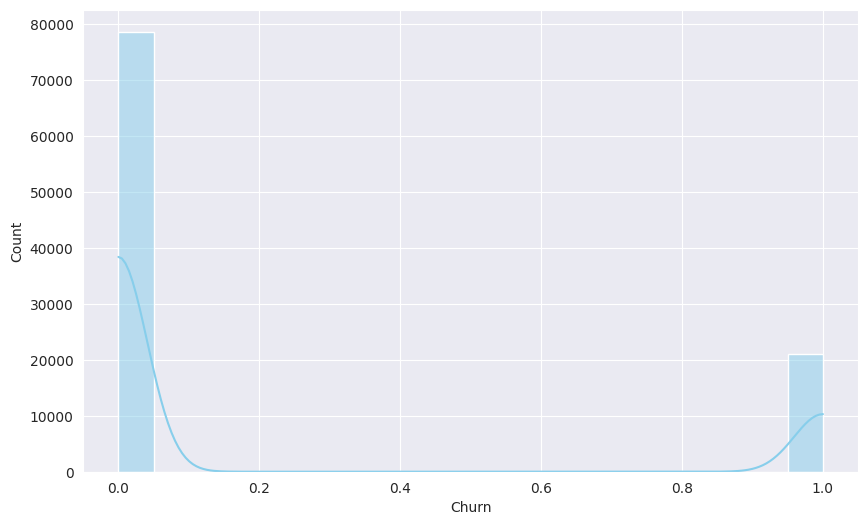

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Churn', bins=20, kde=True, color='skyblue')

Fica evidente que temos muitos mais casos de Não Churn que seria 0 do que Churn que seria 1.

In [18]:
df['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
0.0,78.854254
1.0,21.145746


In [19]:
df[df['Churn'].isnull()]

,CustomerId,Sobrenome,Credit_Score,Pais,Genero,Idade,Tempo_Credito,Balance,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
406,15576928,Walsh,604,Spain,Female,23.0,6,0.00,1,1.0,0.0,1011687.0,NaN
407,15766552,Rossi,640,Spain,Male,23.0,4,0.00,2,0.0,1.0,1011687.0,NaN
408,15674833,Onio,605,Spain,Male,23.0,5,181671.16,2,1.0,1.0,1011687.0,NaN
409,15683534,Boulger,712,Spain,Female,23.0,7,110805.42,2,0.0,1.0,1011687.0,NaN
410,15677955,Hs?eh,673,Spain,Female,23.0,1,0.00,2,1.0,1.0,1011687.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60582,15798521,Ch'en,675,France,Male,33.0,2,0.00,2,1.0,0.0,1011687.0,NaN
60583,15706263,Onyemauchechukwu,711,France,Male,33.0,7,0.00,2,1.0,1.0,1011687.0,NaN
60584,15603319,Onyekachi,712,France,Male,33.0,4,0.00,2,1.0,0.0,1011687.0,NaN
60585,15677512,Nwora,696,France,Male,33.0,2,111432.14,1,1.0,0.0,1011687.0,NaN


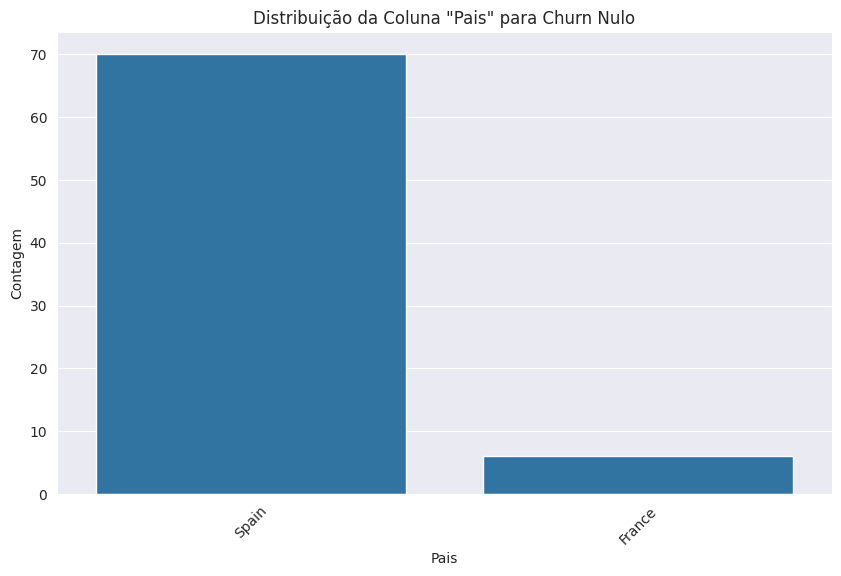

In [20]:
# Seleciona todas as linhas onde a coluna 'Churn' é nula
df_churn_nulo = df[df['Churn'].isnull()]

# Plotando a distribuição dos paises
plt.figure(figsize=(10, 6))
sns.countplot(data=df_churn_nulo, x='Pais')
plt.title('Distribuição da Coluna "Pais" para Churn Nulo')
plt.xlabel('Pais')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

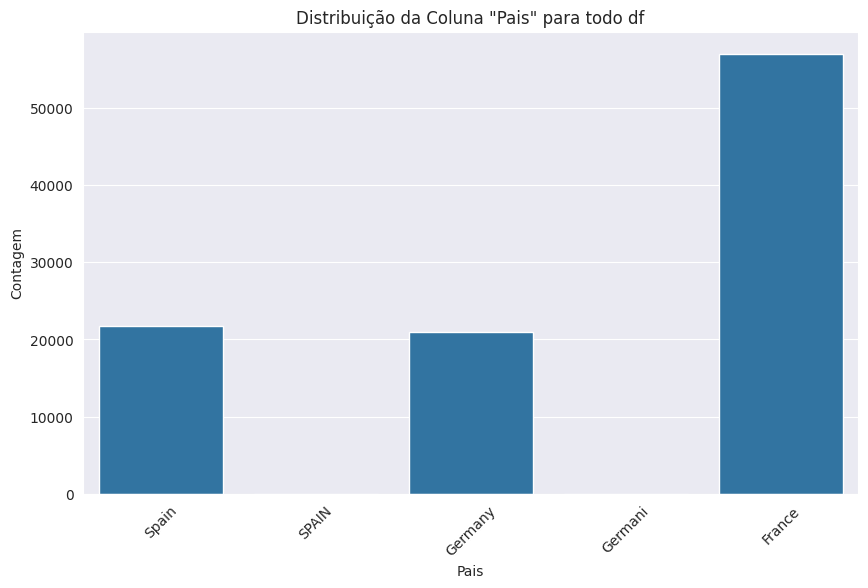

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pais')
plt.title('Distribuição da Coluna "Pais" para todo df')
plt.xlabel('Pais')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

In [22]:
# Nesse caso vamos optar por remover as linhas nulas para evitar vies no modelo!
df.dropna(subset=['Churn'], inplace=True)
df['Churn'].isnull().sum()
df.isnull().sum()

,0
CustomerId,0
Sobrenome,0
Credit_Score,0
Pais,0
Genero,0
Idade,0
Tempo_Credito,0
Balance,0
Qtd_Produtos,0
Possui_Cartao,0


In [23]:
# E agora sim podemos transformar essa coluna em inteiro!
df['Churn'] = df['Churn'].astype(int)

# Outros Tipos de Tratamento
Outro ponto interessante é mantermos os nomes das colunas de forma padronizada, por exemplo, quase todas nossas colunas tem nome em português porém a coluna balance está em inglês.
É interessante padronizarmos.

In [25]:
# Para isso usamos a função rename:
df.rename(columns={'Balance': 'Balanco'}, inplace=True)

df.head()

,CustomerId,Sobrenome,Credit_Score,Pais,Genero,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
0,15813451,Fleetwood-Smith,677,Spain,Male,18.0,5,134796.87,2,1.0,0.0,1011687.0,0
1,15641688,Collier,644,Spain,Female,18.0,7,0.00,1,0.0,1.0,1011687.0,0
2,15757821,Burgess,641,Spain,Male,18.0,1,0.00,2,0.0,1.0,1011687.0,0
3,15673180,Onyekaozulu,826,Spain,Male,18.0,2,0.00,2,0.0,1.0,1011687.0,0
4,15664543,Tuan,774,Spain,Female,18.0,1,185891.54,1,1.0,0.0,1011687.0,0


In [26]:
# Detectando erros de digitação
df['Pais'].unique()

array(['Spain', 'SPAIN', 'Germany', 'Germani', 'France'], dtype=object)

Aqui encontramos 2 problemas que exigem tratamento de dados:

Para Spain temos tanto valor totalmente em caixa alta quanto valores apenas com a primeira letra em caixa alta.
Para Germany temos valores escritos de forma errada, com i, esse erro terá a uma solução parecida a que aplicariamos caso tivessemos acentuações.

In [27]:
# Para transformar todos os dados da coluna pais em caixa baixa:
df['Pais'] = df['Pais'].str.lower()
df['Pais'].unique()

array(['spain', 'germany', 'germani', 'france'], dtype=object)

E se quisessemos em caixa alta?

In [ ]:
df['Pais'] = df['Pais'].str.upper()
df['Pais'].unique()

In [ ]:
# Para isso usaremos a função replace
df['Pais'] = df['Pais'].replace('GERMANI', 'GERMANY')

df['Pais'].unique()

Agora vamos verificar se nossos outros dados categóricos estão com alguma inconsistência:

In [ ]:
df['Genero'].unique()

É muito importante que antes de avançarem em projetos vocês removam todas colunas que não serão importantes!

In [ ]:
df.drop(columns=['Sobrenome'], inplace=True)
df.drop(columns=['CustomerId'], inplace=True)